# Análisis Exploratorio de Datos - YouTube Hate Speech Dataset

Este notebook presenta un análisis exploratorio del conjunto de datos de comentarios de YouTube relacionados con discurso de odio.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import string

# Configuración de visualización
%matplotlib inline
plt.style.use('ggplot')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

## 1. Carga de datos

In [2]:
# Cargar el dataset
df = pd.read_csv('../data/raw/youtube_hate_speech_dataset.csv')

# Mostrar las primeras filas
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")
df.head()

Número de filas: 1000
Número de columnas: 15


,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\r\nDont you reckon them 'black lives matter' ...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [3]:
# Información del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [4]:
# Estadísticas descriptivas
df.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,UgjBJKQSoQMQ6ngCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [5]:
# Verificar valores nulos
df.isnull().sum()

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

## 2. Análisis de etiquetas de discurso de odio

In [6]:
# Contar cuántos comentarios están etiquetados con cada categoría
hate_counts = df.iloc[:, 3:].sum().sort_values(ascending=False)
print("Número de comentarios por categoría de odio:")
hate_counts

Número de comentarios por categoría de odio:


IsToxic            462
IsAbusive          353
IsProvocative      161
IsHatespeech       138
IsRacist           125
IsObscene          100
IsThreat            21
IsReligiousHate     12
IsNationalist        8
IsSexist             1
IsHomophobic         0
IsRadicalism         0
dtype: int64

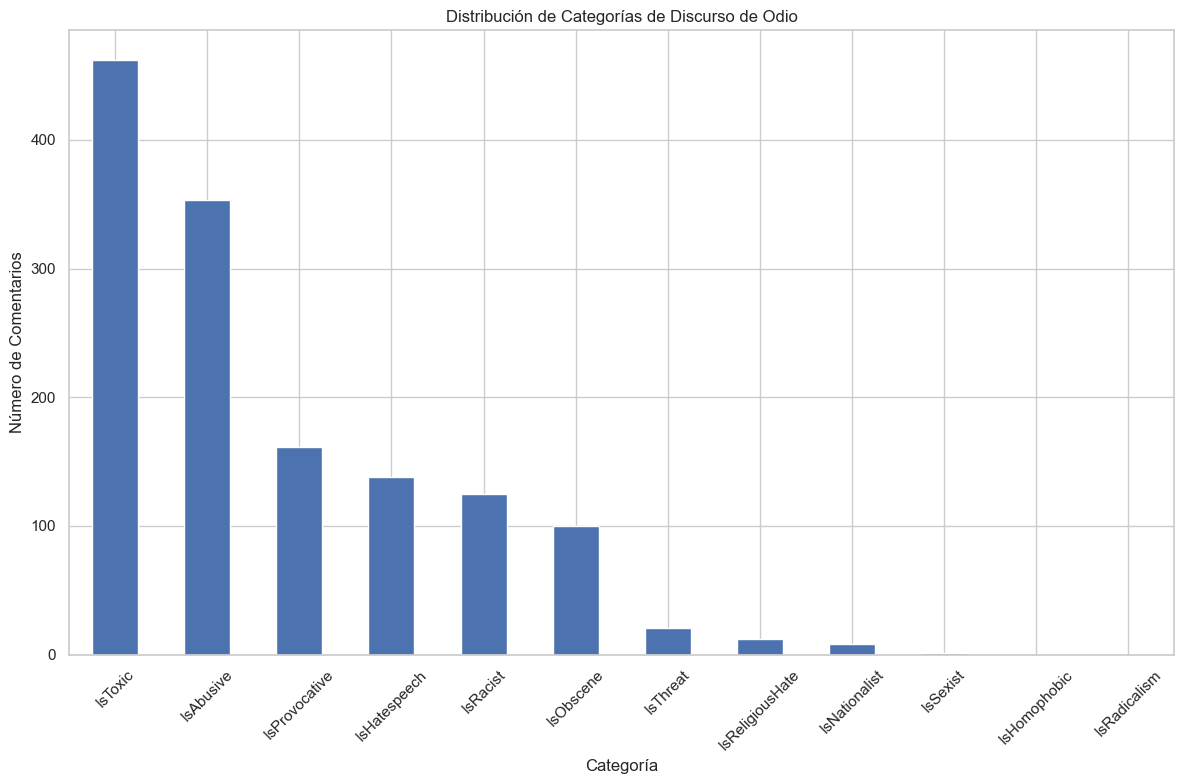

In [7]:
# Visualizar la distribución de etiquetas de odio
plt.figure(figsize=(12, 8))
hate_counts.plot(kind='bar')
plt.title('Distribución de Categorías de Discurso de Odio')
plt.xlabel('Categoría')
plt.ylabel('Número de Comentarios')
plt.xticks(rotation=45)
plt.tight_layout()

## 3. Comentarios tóxicos vs no tóxicos

Text(0.5, 1.0, 'Proporción de Comentarios Tóxicos vs No Tóxicos')

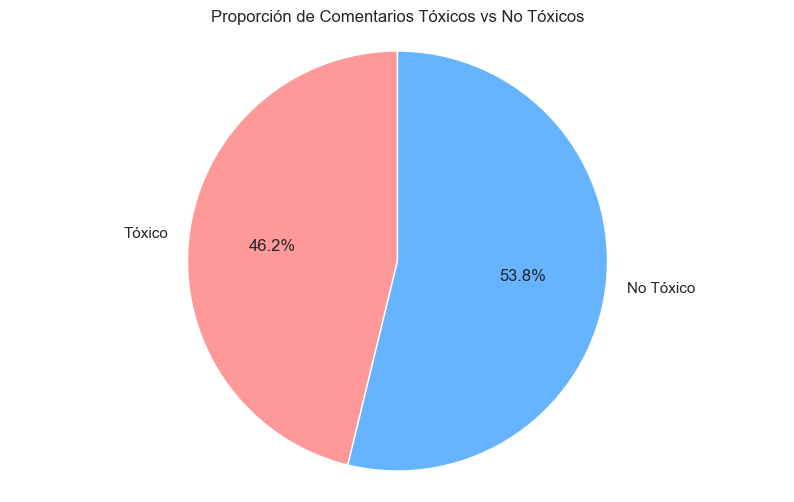

In [8]:
# Porcentaje de comentarios tóxicos vs no tóxicos
toxic_comments = df['IsToxic'].sum()
non_toxic_comments = len(df) - toxic_comments
labels = ['Tóxico', 'No Tóxico']
sizes = [toxic_comments, non_toxic_comments]

plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Proporción de Comentarios Tóxicos vs No Tóxicos')

## 4. Correlación entre etiquetas

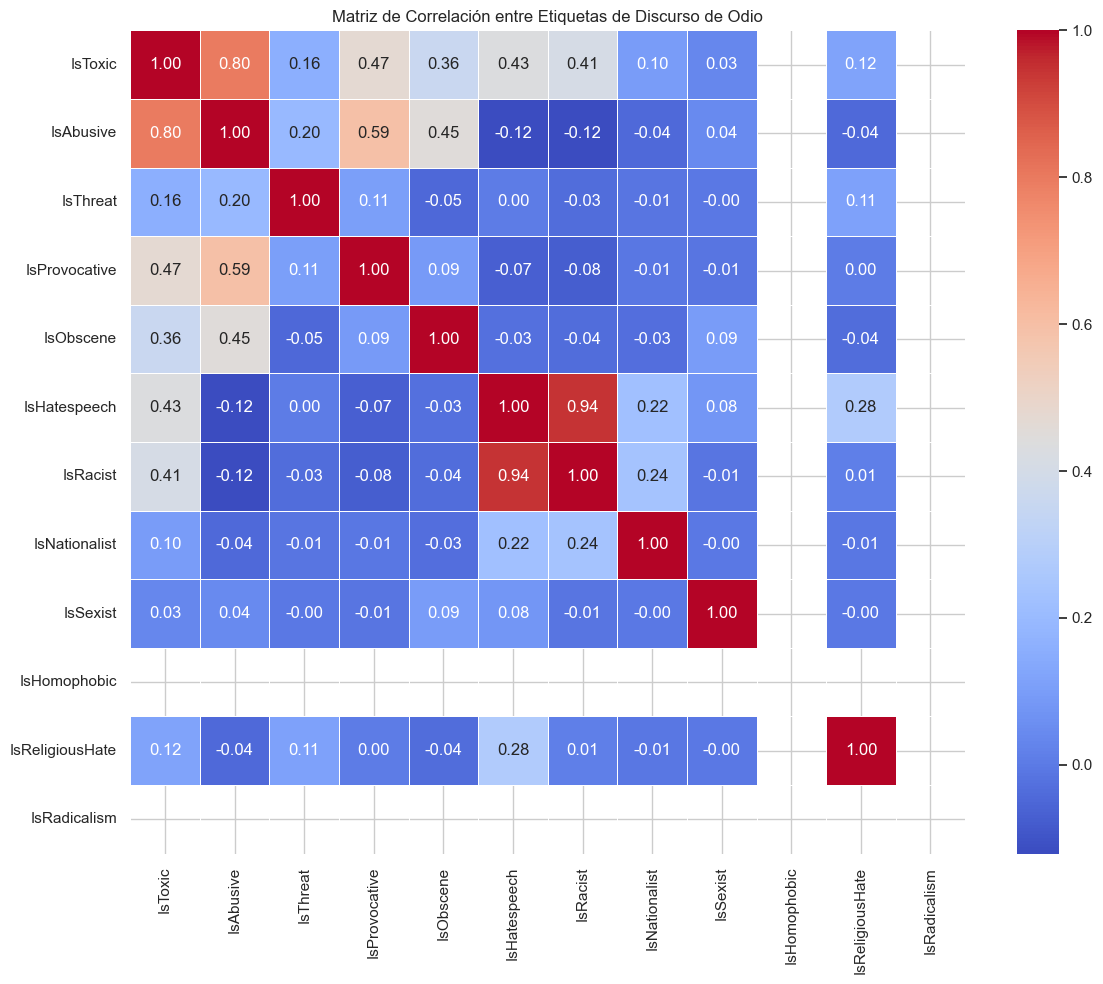

In [9]:
# Crear una matriz de correlación para las etiquetas de odio
hate_labels = df.iloc[:, 3:]
correlation_matrix = hate_labels.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre Etiquetas de Discurso de Odio')
plt.tight_layout()

## 5. Análisis de texto

In [10]:
# Función para limpiar texto
def clean_text(text):
    if isinstance(text, str):
        # Convertir a minúscula
        text = text.lower()
        # Eliminar puntuación
        text = re.sub(f'[{string.punctuation}]', ' ', text)
        # Eliminar números
        text = re.sub(r'\d+', '', text)
        # Eliminar espacios múltiples
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    return ""

# Aplicar limpieza de texto
df['CleanText'] = df['Text'].apply(clean_text)

# Longitud de los comentarios
df['TextLength'] = df['Text'].apply(lambda x: len(str(x)))

Text(0, 0.5, 'Frecuencia')

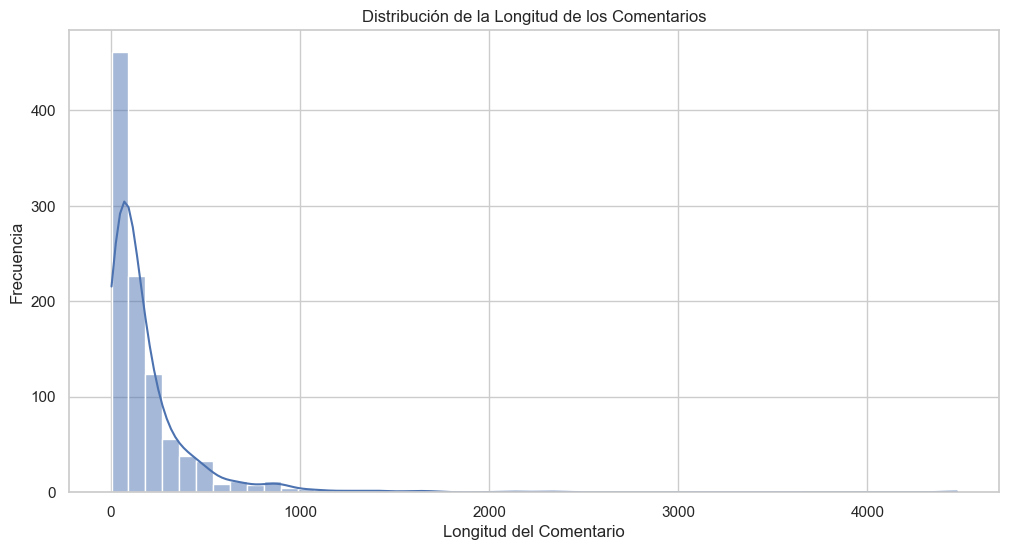

In [11]:
# Visualizar la distribución de longitud de comentarios
plt.figure(figsize=(12, 6))
sns.histplot(df['TextLength'], bins=50, kde=True)
plt.title('Distribución de la Longitud de los Comentarios')
plt.xlabel('Longitud del Comentario')
plt.ylabel('Frecuencia')

Longitud media de comentarios tóxicos: 189.85 caracteres
Longitud media de comentarios no tóxicos: 182.67 caracteres


Text(0, 0.5, 'Longitud del Comentario')

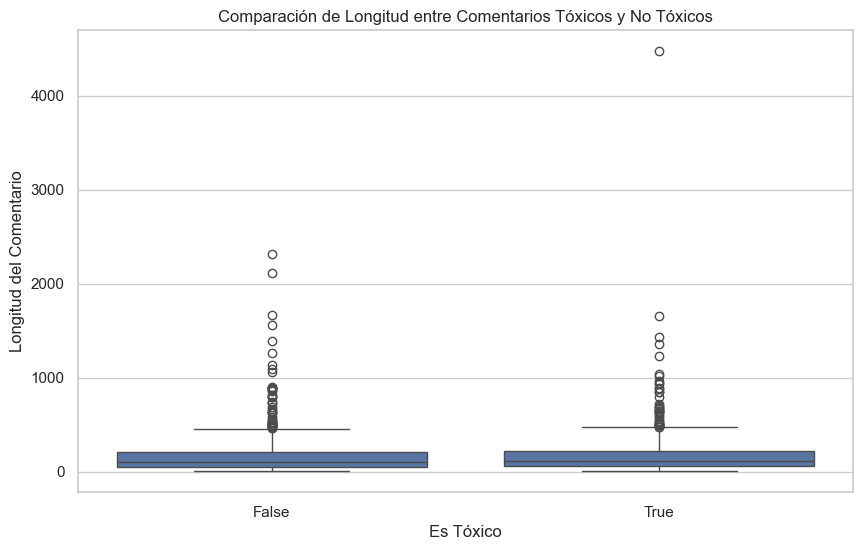

In [12]:
# Comparar longitud media entre comentarios tóxicos y no tóxicos
toxic_length = df[df['IsToxic'] == True]['TextLength'].mean()
non_toxic_length = df[df['IsToxic'] == False]['TextLength'].mean()
print(f"Longitud media de comentarios tóxicos: {toxic_length:.2f} caracteres")
print(f"Longitud media de comentarios no tóxicos: {non_toxic_length:.2f} caracteres")

plt.figure(figsize=(10, 6))
sns.boxplot(x='IsToxic', y='TextLength', data=df)
plt.title('Comparación de Longitud entre Comentarios Tóxicos y No Tóxicos')
plt.xlabel('Es Tóxico')
plt.ylabel('Longitud del Comentario')

## 6. Nube de palabras

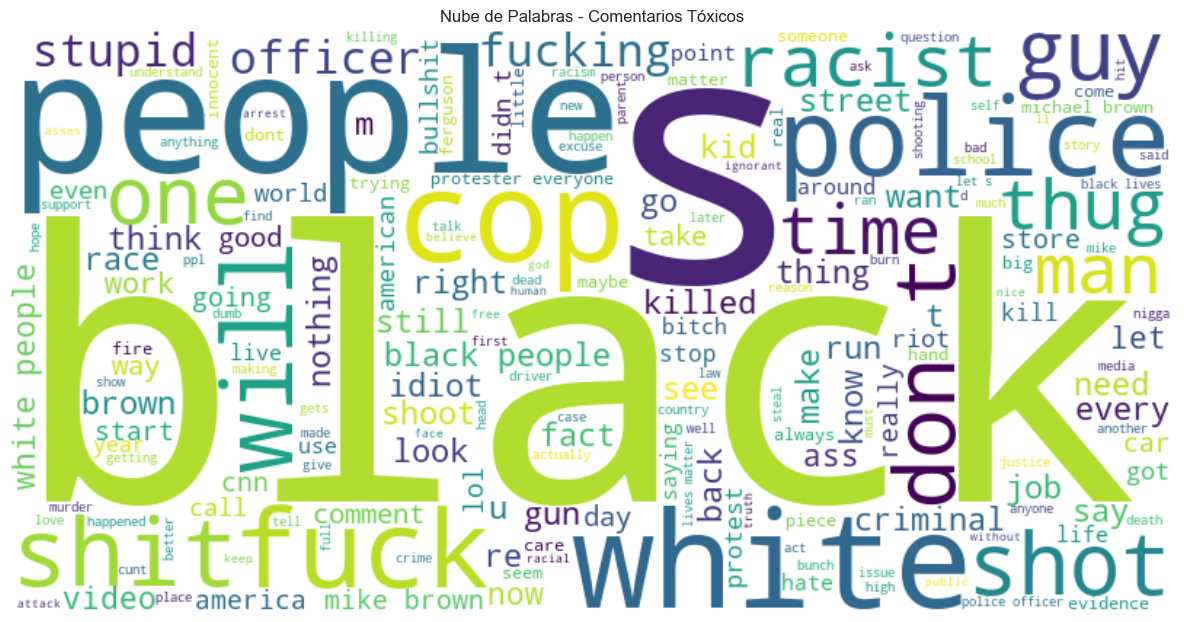

In [13]:
# Nube de palabras para comentarios tóxicos
toxic_text = ' '.join(df[df['IsToxic'] == True]['CleanText'])
if toxic_text.strip():
    plt.figure(figsize=(12, 8))
    toxic_wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(toxic_text)
    plt.imshow(toxic_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras - Comentarios Tóxicos')
    plt.tight_layout()

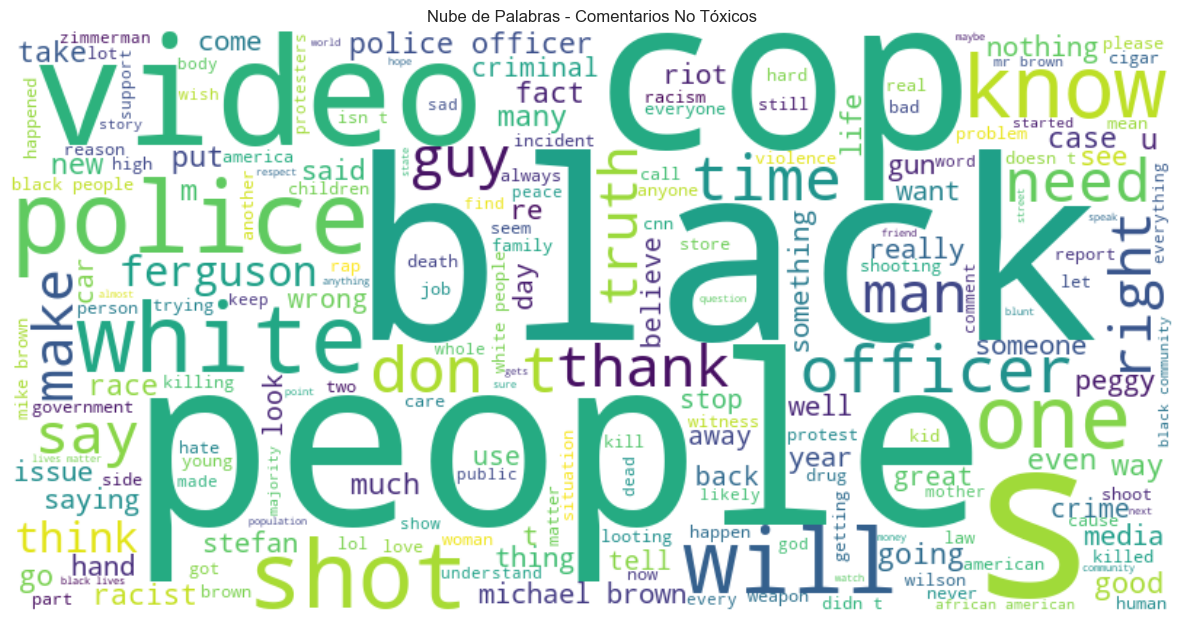

In [14]:
# Nube de palabras para comentarios no tóxicos
non_toxic_text = ' '.join(df[df['IsToxic'] == False]['CleanText'])
if non_toxic_text.strip():
    plt.figure(figsize=(12, 8))
    non_toxic_wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(non_toxic_text)
    plt.imshow(non_toxic_wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras - Comentarios No Tóxicos')
    plt.tight_layout()

## 7. Análisis por video

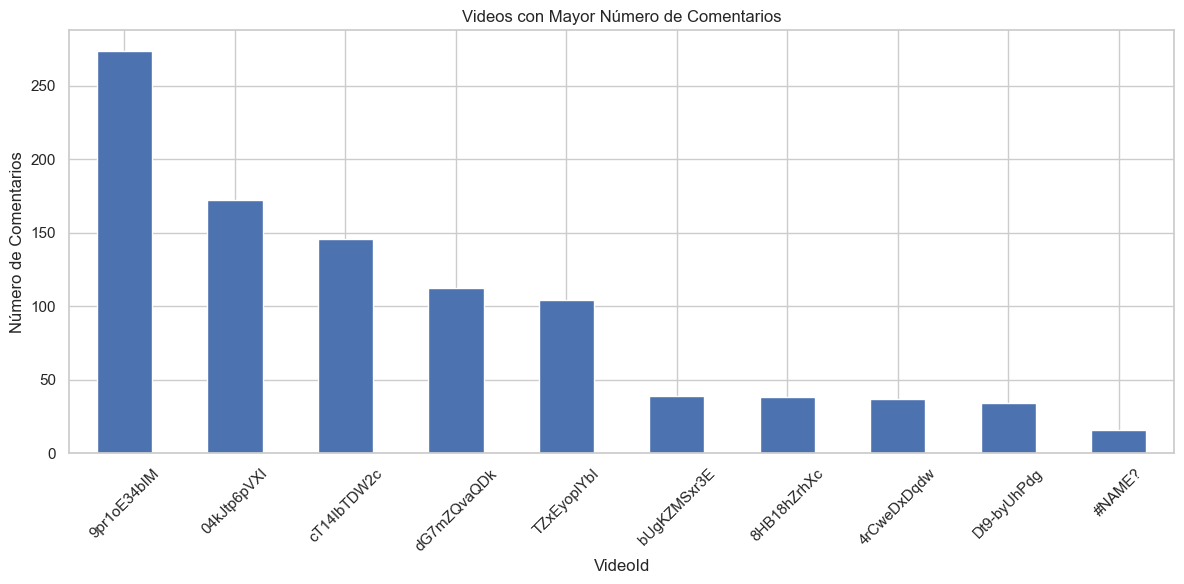

In [15]:
# Ver cuántos comentarios hay por video
video_counts = df['VideoId'].value_counts()
top_videos = video_counts.head(10)

plt.figure(figsize=(12, 6))
top_videos.plot(kind='bar')
plt.title('Videos con Mayor Número de Comentarios')
plt.xlabel('VideoId')
plt.ylabel('Número de Comentarios')
plt.xticks(rotation=45)
plt.tight_layout()

## 8. Análisis de categorías múltiples

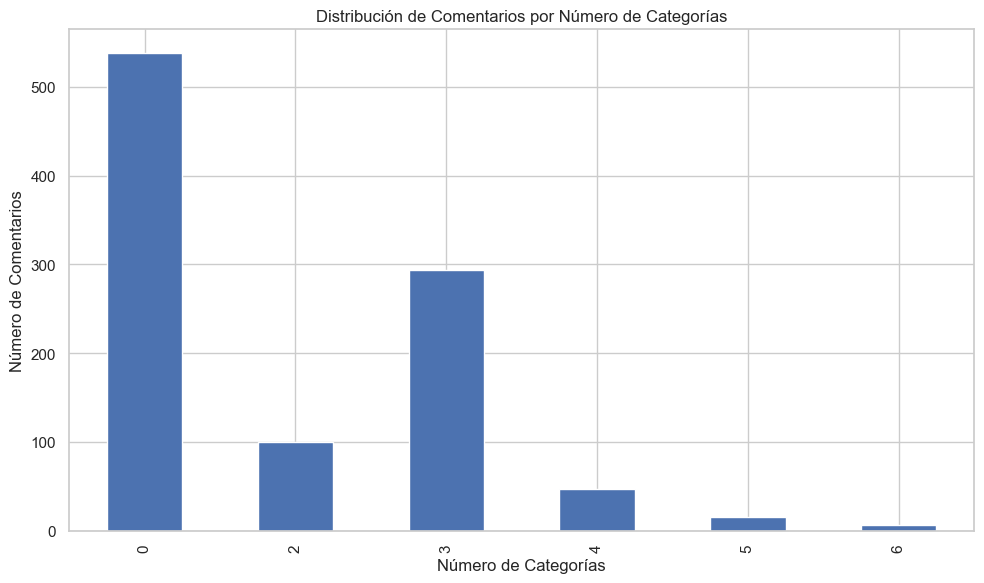

In [17]:
# Contar cuántos comentarios tienen múltiples etiquetas de odio
is_columns = [col for col in df.columns if col.startswith('Is')]
df['NumCategories'] = df[is_columns].sum(axis=1)
category_counts = df['NumCategories'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Distribución de Comentarios por Número de Categorías')
plt.xlabel('Número de Categorías')
plt.ylabel('Número de Comentarios')
plt.tight_layout()

## 9. Análisis de coincidencia entre diferentes tipos de discurso de odio

In [18]:
# Crear una tabla de contingencia entre IsToxic e IsAbusive
pd.crosstab(df['IsToxic'], df['IsAbusive'])

IsAbusive,False,True
IsToxic,,
False,538,0
True,109,353


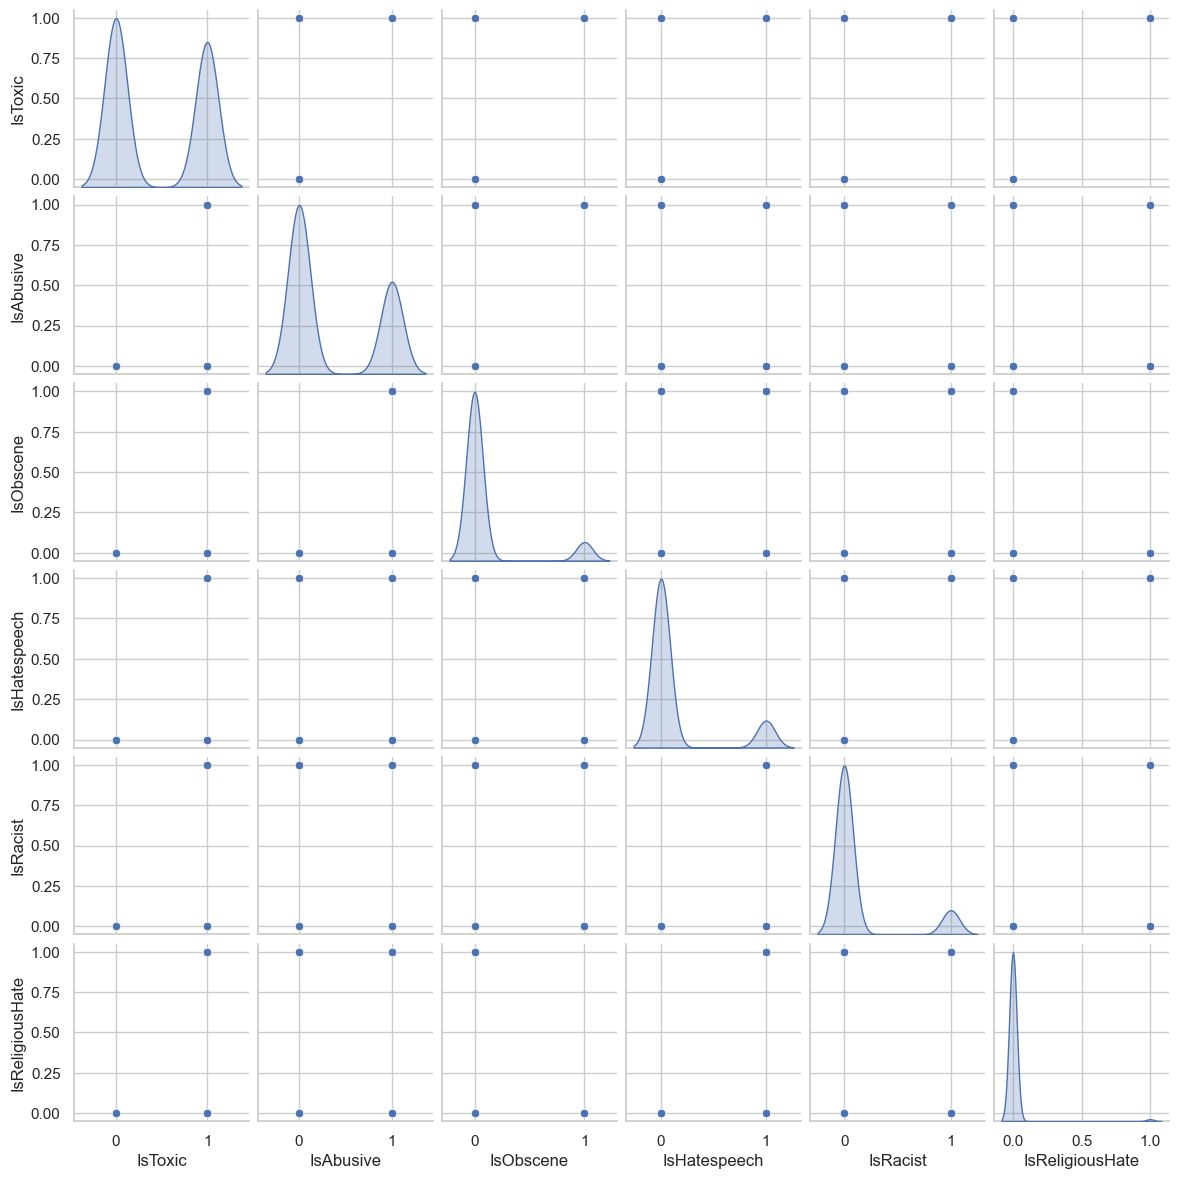

In [19]:
# Visualizar las relaciones entre las principales categorías
categories = ['IsToxic', 'IsAbusive', 'IsObscene', 'IsHatespeech', 'IsRacist', 'IsReligiousHate']
sns.pairplot(df[categories], diag_kind='kde', height=2)

## 10. Conclusiones

Este análisis exploratorio muestra varios aspectos importantes del dataset de comentarios de YouTube:

1. Distribución de categorías de odio: Hemos identificado qué tipos de discurso de odio son más comunes en estos comentarios.

2. Relaciones entre categorías: Existe correlación entre ciertas categorías de odio, lo que indica que algunos comentarios presentan múltiples tipos de toxicidad simultáneamente.

3. Características textuales: Hemos analizado la longitud y contenido de los comentarios tóxicos vs no tóxicos, observando diferencias en su estructura y vocabulario.

4. Distribución por video: Algunos videos concentran un mayor número de comentarios tóxicos, lo que podría indicar que su contenido genera más controversia.

Estos hallazgos proporcionan una base sólida para desarrollar algoritmos de detección de discurso de odio en plataformas online.